We plot the probability of electron neutrino appearance as a function of neutrino energy.

We plot it for two different oscillation parameter values for Θ_23: the standard value from PDG, and a bit larger one and see how it affects the energy spectrum.  

PDG Theta_23: 0.6724753607934152
Alternative Theta_23:  0.9


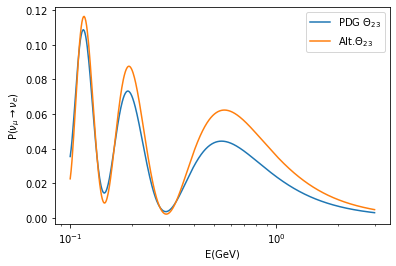

In [1]:
from PMNS2 import PMNS
import numpy as np
import matplotlib.pyplot as plt

# instantiate the  class of neutrinos 
x=PMNS()
# charge parity 
x.setDeltaCP(-90)
x.setMassOrderModel(1,False) # what is this? 
x.calcPMNS()

print("PDG Theta_23:", x.theta_23)

# Probability 
Prob =[]
# Neutrino energy
Enu = []
E=0.6 #GeV
L=295 #km, Near Detector to Far Detector (T2K)
# oscillating flavours: nu_e:0, nu_mu:1, nu_tau:2
# E.g. oscillating from nu_mu to nu_e: 1 -> 0 

# Array of energies
for v in np.array(np.arange(0.1,3,0.001)):
    value = x.calcOsc_E(1,0,L,v) # calculating oscillation nu_mu to nu_e
    Prob.append(value) # append the value of value into Probability
    Enu.append(v) # v value append in energy of neutrino 

#plt.plot(Enu,Prob)
plt.semilogx(Enu,Prob, label=r'PDG $\Theta_{23}$')
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{e}$)')
plt.xlabel('E(GeV)')
#plt.axis([0.1,3, 0., 0.1]) # limit of x axis and y axis

# Now take another parameter for Theta_23
x2= PMNS()
x2.setDeltaCP(-90)
x2.setMassOrderModel(1,False)
x2.theta_23 = 0.9 # is this PDG value?
x2.calcPMNS() # calculate PMNS
print("Alternative Theta_23: ", x2.theta_23)

Prob2 = []
for v in np.array(np.arange(0.1,3,0.001)):
    value = x2.calcOsc_E(1,0,L,v)
    Prob2.append(value)
plt.semilogx(Enu,Prob2, label=r'Alt.$\Theta_{23}$') # prob vs neutrino energy
plt.legend()
plt.show()



In the figure above, we can see that the oscillation results in an oscillating energy spectrum. 

Therefore, for a 
* given flux of neutrinos 
* and a fixed detector, 
one can calculate for a variety of oscillation paramter values what the model predicted energy spectrum would look like and compare with data to get the best one in agreement. 

In order to measure the neutrino oscillation probabilities from counting events at the Far Detector (FD), one needs an
* unoscillated flux model
* target volume mass and size
* cross section model

With such a model, one can generate various predictions for the Far Detector event spectrums as a function of the various neutrino oscillation parameters, and compare with the data. 


We use a fixed neutrino flux model given from T2K.

It is given for a nominal integrated flux per 10^21 POT (proton on target) 

We scale all the results to a target integrated flux of 5x10^21 POT in the following demo example. 

This is an arbitrary choice, one can change. 

<b>LOWERING</b> it will <b>increase the size of the confidence</b> obtained for the parameters of interest. 

The target at the Far Detector is a large water Cherenkov detector. Therefore, one needs the total neutrino scattering cross section on water. 

In addition, we are going to use a <b>tuned, unoscillated neutrino</b> flux prediction. 

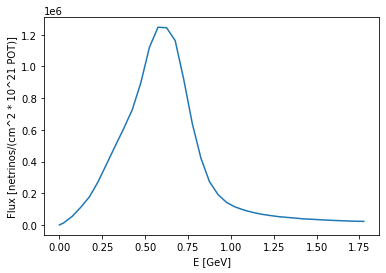

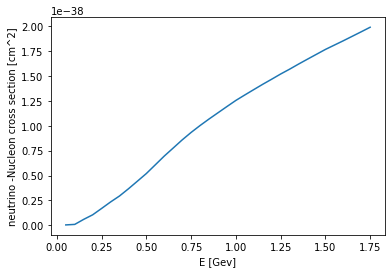

In [8]:
# fixed neutrino flux model given from T2K
from Flux_CrossSection_model import Flux, E,e,xsec,npoints,flux_norm

plt.plot(E,Flux)
plt.xlabel("E [GeV]")
plt.ylabel("Flux [netrinos/(cm^2 * 10^21 POT)]")
plt.show()

plt.plot(e,xsec)
plt.xlabel("E [Gev]")
plt.ylabel("neutrino -Nucleon cross section [cm^2]")
plt.show()

The units are important. 
* we have flux in unit of [neutrinos/cm^2] per 10^21 POT
* cross section unit is 10^-38 cm^2

Then we need 
* the distance
* target mass
* volume
* oscillation model (to make prediction for the amount of detected events at the FD)

We are going to use the Ve electron neutrino appearance mode; oscillation probabilities using P(V_mu -> V_e)

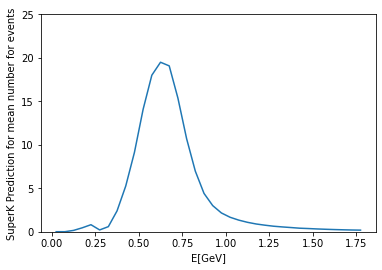

In [13]:
# oscillation probability from nu_mu to nu_e

# far detector distance 
L = 295 # kilometers
# Far detector heigh
H = 42 # meters
Hcm = H*100 # cm 
D = 20 # meters
Dcm = D*100 #cm 

# SK fiducial mass 22.5kton water
Density = 1000 # kg/m3
Density_gcm3 = 1 # g/cm3
Mol = 6e+23 # avogadro n of particles

# This is the neutrino oscillation model 
x= PMNS()
x.setDeltaCP(-90)
x.setMassOrderModel(1,False)

# true value
# mass squared difference
# must be between interval 
x.delta_32=0.003
x.calcPMNS()

# lets calculate the mean prediction for the far detector
# mean expectation of the model 
Nev = []
Ev = []
for i in np.array(np.arange(0,npoints)):
    if E[i] > 0:
        prob =x.calcOsc_E(1,0, L, E[i])
        Ev.append(E[i])
        # prob =1
        Nev.append( prob*flux_norm*Flux[i]*np.interp(E[i], e,xsec) * Density_gcm3 * Hcm*(Dcm*Dcm)*Mol)
        # [n_particles/(cm2*10^21 POT)]*[cm2]*[g/cm3]+[cm3]*[Mol]/ [g/Mol]
        # Note: cross section is already given per Water molecule, therefore molar mass not needed 

# this is the mean prediction 
plt.plot(Ev, Nev)
plt.ylim(0.0,25.0)
plt.xlabel("E[GeV]")
plt.ylabel("SuperK Prediction for mean number for events")
plt.show()



The above is the <b>prediction of the "mean" number of electron neutrino events detected at the Far Detector</b>.

In reality, the measurement fluctuates following the Poisson distribution around the mean. 

Therefore, the <b>observation is a random sampling from this mean</b> , and we need to randomly sample for each energy bin from a Poisson with the mean given by the curve above. 

Note that we need to <b>interpolate the cross section and flux model</b> to evaluate it at the energy value of interest:


C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


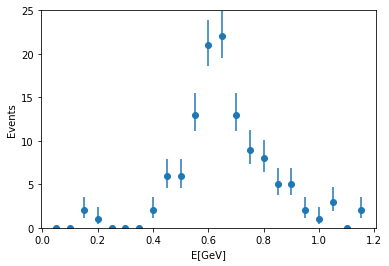

In [18]:
# interpolate the cross section and flux model to evaluate it at teh energy balue of interest
from scipy.stats import chi2
Data = []
DataerrLow=[] # data low error
DataerrUp = [] # data up error 
EData = []
for ei in np.array(np.arange(0,1.2,0.05)):
    if ei>0:
        Nobs = np.random.poisson(np.interp(ei, np.asarray(Ev, dtype=np.float32),np.asarray(Nev, dtype=np.float32)))
        Data.append(Nobs)
        # 68% asymmetric error on Poisson from chi2 quantiles
        DataerrLow.append(Nobs -0.5*chi2.ppf(1-0.68, 2*Nobs))
        DataerrUp.append(0.5*chi2.ppf(0.68, 2*(Nobs+1))-Nobs)
        EData.append(ei) 

plt.errorbar(EData, Data, yerr=[DataerrLow, DataerrUp], fmt='o')
plt.ylim(0.0,25.0)
plt.xlabel("E[GeV]")
plt.ylabel("Events")
plt.show()

# Using the Bayes theorem and PyMC3 to fit the data with the PMNS model

We aim to try to <b>measure the compatibility with the data </b> 

First we <b>create a mean prediction as a function of the parameters of interest (theta 23 and deltaM32)</b>

In [30]:
import scipy.stats as stats
import pymc3 as pm 
import mpmath as mp
import theano
import theano.tensor as t 
from theano.compile.ops import as_op

# modify the model 
# re run the code many time and make the plot
# plot the true value vs fit value with ranges
# upper and lower limit

# create another instance of PMNS class
xnew=PMNS()
xnew.setDeltaCP(-90)
xnew.setMassOrderModel(1,False)
m32nominal_norm =xnew.delta_m32

# My Model 
# Some utility functions:
# Predicted mean energy spectrum
@as_op(itypes=[t.dscalar,t.dscalar],otypes=[t.dvector])
def GetVectorMeans(theta23, dm32):
    xnew.theta23 = theta23
    xnew.delta_m32 = dm32
    xnew.setMassOrderModel(1,False,scale_=dm32/m32nominal_norm)
    xnew.calcMassMatrix()
    myNev=[]
    for i in np.array(np.arange(0,len(EData))):
        if EData[i]>0:
            prob = xnew.calcOsc_E(1,0,L,EData[i])
            myNev.append( prob*flux_norm*Flux[i] * np.interp(EData[i],e,xsec) * Density_gcm3*Hcm*(Dcm*Dcm)*Mol)
    return np.array(myNev)

import scipy.stats as stats
import pymc3 as pm
import mpmath as mp
import theano
import theano.tensor as t
from theano.compile.ops import as_op

# Create another instance of PMNS class
# modify the model 
# re run the code many time and make the plot 
# plot true value vs fit value with ranges 
# upper and lower limit 
xnew = PMNS()
xnew.setDeltaCP(-90)
xnew.setMassOrderModel(1, False)
m32nominal_norm = xnew.delta_m32

# My Model
# Some utility functions:
# Predicted mean energy spectrum
@as_op(itypes=[t.dscalar, t.dscalar],otypes=[t.dvector])
def GetVectorMeans(theta23, dm32):
    xnew.theta_23 = theta23
    xnew.delta_m32 = dm32
    xnew.setMassOrderModel(1, False, scale_=dm32/m32nominal_norm)
    xnew.calcMassMatrix()
    xnew.calcPMNS()
    myNev = []
    for i in np.array(np.arange(0,len(EData))):
        if EData[i] > 0:
            prob = xnew.calcOsc_E(1, 0, L, EData[i])
            myNev.append( prob*flux_norm*Flux[i] * np.interp(EData[i], e,xsec) * Density_gcm3 * Hcm*(Dcm*Dcm)*Mol)

    return np.array(myNev)

# GetVectorMeans(0.68,0.002)
# p1 = t.dscalar('0.68')
# p2 = t.dscalar('0.002')
# GetVectorMeans(p1, p2)
Data = np.array(Data)


Calculate the posterior probability using Bayes-theorem.

Our <b>likelihood</b>:  is the joint probability of the data given some values for the two neutrino oscillation parameters

<b>Prior probability for the parameters</b>: are just simple uniform pdfs


In [31]:
# assume poisson likelihood and uniform/normal priors
with pm.Model() as model:
    # prior on theta
    theta_p = pm.Uniform("theta", lower=0.01, upper=0.99)
    # prior on deltam_32
    # take this interval 
    dm32_p = pm.Uniform("dm32", lower=0.001, upper= 0.004)
    # likelihood poisson 
    #GetVectorMeans =pm.Deterministic("mean expectation", GetVectorMeans(theta_p,dm32_p))
    y =pm.Poisson("y", GetVectorMeans(theta_p,dm32_p), observed = Data)
    # Instantiate sampler
    step = pm.Metropolis()
    # Draw posterior samples
    trace = pm.sample(10000,step=step, tune=2000, cores =1, return_inferencedata=True)
    

C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [dm32]
>Metropolis: [theta]


C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\Ohh no need to thank\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 479 seconds.
The number of effective samples is smaller than 10% for some parameters.
